In [3]:
from astropy.io import fits
from glob import glob
import pandas as pd
from math import sqrt 
import numpy as np

In [30]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (25, 16)

In [31]:
Vx = fits.open("Vx.fits")
Vy = fits.open("Vy.fits")

In [32]:
VxTop = list()
VyTop = list()
res_vector = list()
avg_vel = list()
max_vel = list()
min_vel = list()
for d in range(11):
    VxTop.append(np.array(Vx[0].data[d]))
    VyTop.append(np.array(Vy[0].data[d]))
    res_vector.append(np.sqrt(VxTop[d]**2 + VyTop[d]**2))
    avg_vel.append(np.average(res_vector[d]))
    max_vel.append(np.max(res_vector[d]))
    min_vel.append(np.min(res_vector[d]))

In [33]:
VxTop[0].shape

(256, 256)

In [34]:
res_vector[0].shape

(256, 256)

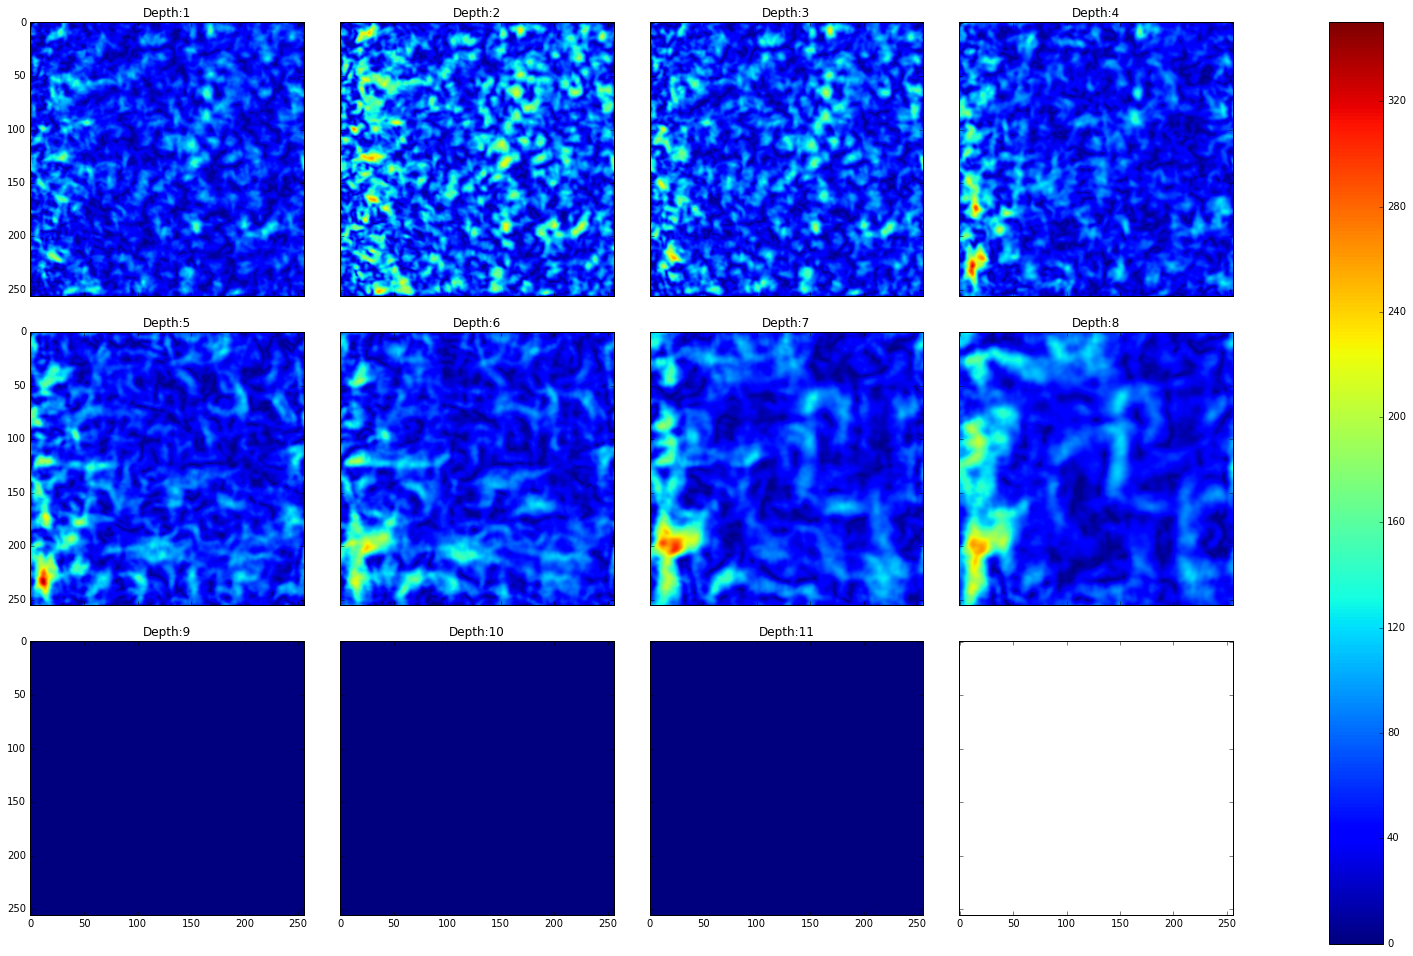

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure()
fig.set_title("Resultant velocity accross depth")

grid = AxesGrid(fig, 111,
                nrows_ncols=(3, 4),
                axes_pad=0.5,
                share_all=True,
                label_mode="L",
                cbar_location="right",
                )
d = 0
for val, ax in zip(res_vector,grid):
    d += 1
    ax.set_title("Depth:" + str(d) )
    im = ax.imshow(val, vmin=0, vmax=350)
    
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
fig.colorbar(im, cax=cax)

plt.show()